# ECG

### [The MIT-BIH Long Term Database](https://archive.physionet.org/physiobank/database/ltdb/)
#### This database contains 7 long-term ECG recordings (14 to 22 hours each), with manually reviewed beat annotations.

#### 14149 – Age: 47  Sex: M

## Waveform
<br>
<img src="14149.png" alt="ECG_DB">

In [1]:
# Importar as bibliotecas
import heartpy as hp
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [2]:
# Definir a taxa de amostragem
# 0.0078125 s = 128 Hz
sample_rate = 128 

In [3]:
# Importar os dados
db = pd.read_csv('14149.csv')
db

,'sample interval','ECG1','ECG2'
0,'0.0078125 sec','mV','mV'
1,0,-0.045,0.025
2,1,-0.025,0.035
3,2,-0.005,0.055
4,3,0.015,0.085
...,...,...,...
7676,7675,-0.075,-0.175
7677,7676,-0.075,-0.175
7678,7677,-0.075,-0.165
7679,7678,-0.065,-0.165


In [4]:
db.columns = ['sample interval', 'ECG1', 'ECG2']
db

,sample interval,ECG1,ECG2
0,'0.0078125 sec','mV','mV'
1,0,-0.045,0.025
2,1,-0.025,0.035
3,2,-0.005,0.055
4,3,0.015,0.085
...,...,...,...
7676,7675,-0.075,-0.175
7677,7676,-0.075,-0.175
7678,7677,-0.075,-0.165
7679,7678,-0.065,-0.165


In [5]:
filtro = db.loc[(db['ECG1'] == "'mV'")]
filtro
db = db.drop(filtro.index)

In [6]:
db.dtypes

sample interval    object
ECG1               object
ECG2               object
dtype: object

In [14]:
data = db['ECG1'].astype(float, errors = 'raise')

## Plot waveform 

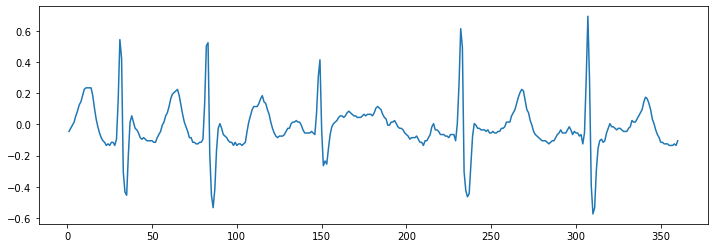

In [15]:
plt.figure(figsize=(12,4))
plt.plot(data[0:360])
plt.show()

bpm: 101.416567
ibi: 591.619318
sdnn: 113.291825
sdsd: 101.372892
rmssd: 158.105046
pnn20: 0.867470
pnn50: 0.674699
hr_mad: 82.031250
sd1: 111.796655
sd2: 111.755279
s: 39250.638869
sd1/sd2: 1.000370
breathingrate: 0.233333


C:\Users\Lucia\Anaconda3\lib\site-packages\heartpy\visualizeutils.py:119: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


<Figure size 864x288 with 0 Axes>

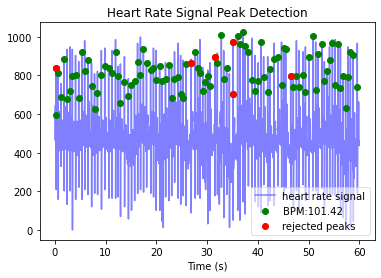

In [16]:
# Análise
wd, m = hp.process(hp.scale_data(data), sample_rate)

plt.figure(figsize=(12,4))
hp.plotter(wd, m)

# Mostrar as medidas computadas
for measure in m.keys():
    print('%s: %f' %(measure, m[measure]))